In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
os.chdir("C:/Users/fritzdi/DataScience/data")
cwd = os.getcwd()
print(cwd)

C:\Users\fritzdi\DataScience\data


In [3]:
df = pd.read_csv("DenverAirbnb-summarylistings.csv")
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,177,Tiny Home in the Heart of the City- ECO FRIENDLY,615,Joe,Washington Virginia Vale,39.69753,-104.92588,Entire home/apt,68,1,78,12/31/2020,1.43,1,333
1,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,Highland,39.76703,-105.00256,Entire home/apt,134,3,138,2/22/2021,4.45,1,36
2,364,Lodo / RiNo LOFT via airport train,783,Jason,Five Points,39.76551,-104.97902,Entire home/apt,179,185,87,4/26/2016,0.61,1,363


In [4]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [5]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

In [6]:
list(gdf.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'geometry']

In [7]:
gdf.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,177,Tiny Home in the Heart of the City- ECO FRIENDLY,615,Joe,Washington Virginia Vale,39.69753,-104.92588,Entire home/apt,68,1,78,12/31/2020,1.43,1,333,POINT (-104.92588 39.69753)
1,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,Highland,39.76703,-105.00256,Entire home/apt,134,3,138,2/22/2021,4.45,1,36,POINT (-105.00256 39.76703)
2,364,Lodo / RiNo LOFT via airport train,783,Jason,Five Points,39.76551,-104.97902,Entire home/apt,179,185,87,4/26/2016,0.61,1,363,POINT (-104.97902 39.76551)
3,590,Comfortable - and a great value!,933,Jill,North Park Hill,39.75361,-104.91237,Private room,54,1,606,9/1/2020,4.17,2,0,POINT (-104.91237 39.75361)
4,592,private,933,Jill,North Park Hill,39.75438,-104.91156,Private room,45,29,156,11/8/2020,1.07,2,111,POINT (-104.91156 39.75438)


In [8]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

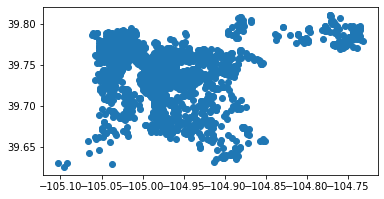

In [9]:
# The .plot() method in geopandas is based on matplotlib
# there is an argument "kind" where the default is "geo" so it automagically makes a map

gdf.plot()

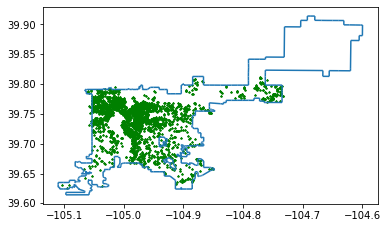

In [10]:
denver = gpd.read_file("county_boundary_lines/county_boundary_lines.shp")

base = denver.plot()
gdf.plot(ax=base, marker='*',color='green',markersize=3)
plt.show()

In [11]:
census = gpd.read_file("census_tracts_2010/census_tracts_2010.shp")

In [12]:
census.head(3)

,TRACT_NAME,GEOID_TRAC,GEOID_NUM,POPULATION,HISPANIC_2,WHITE_2010,BLACK_2010,NATIVE_AM_,ASIAN_2010,HAWPACIS_2,...,RENTED_A_2,RENTED_A_3,RENTED_A_4,RENTED_A_5,RENTED_A_6,RENTED_A_7,RENTED_A_8,SHAPE_Leng,SHAPE_Area,geometry
0,Census Tract 17.01,08031001701,8.031002e+09,4350.0,290.0,3539.0,94.0,16.0,327.0,1.0,...,255.0,204.0,96.0,97.0,195.0,127.0,41.0,0.046437,0.000120,"POLYGON ((-104.99731 39.75663, -104.99726 39.7..."
1,Census Tract 17.02,08031001702,8.031002e+09,3648.0,355.0,2744.0,254.0,34.0,122.0,4.0,...,215.0,216.0,117.0,68.0,63.0,30.0,10.0,0.042534,0.000117,"POLYGON ((-104.98738 39.74070, -104.98739 39.7..."
2,Census Tract 18,08031001800,8.031002e+09,3209.0,1091.0,1810.0,128.0,33.0,75.0,0.0,...,136.0,166.0,82.0,56.0,71.0,45.0,10.0,0.047632,0.000102,"POLYGON ((-104.98743 39.72584, -104.98744 39.7..."


In [13]:
# list(census.columns)

<AxesSubplot:>

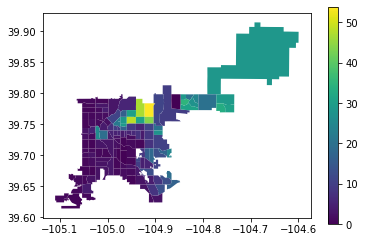

In [14]:
# Use the "column" argument, along with a numerical value attribute to make a choropleh map

census.plot(column='PCT_BLACK', legend=True)

In [15]:
trees = gpd.read_file("tree_canopy_assessment_2013___land_use/tree_canopy_assessment_2013___land_use.shp")

<AxesSubplot:>

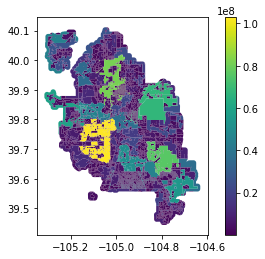

In [16]:
trees.plot(column='AREA_SQKM', legend=True)

In [34]:
trees.describe()

,AREA_SQKM,SHAPE_Leng,SHAPE_Area
count,8.518000e+03,8518.000000,8.518000e+03
mean,2.868368e+05,0.024127,3.018415e-05
std,2.693443e+06,0.253282,2.834545e-04
min,5.597187e-02,0.000011,5.877720e-12
25%,5.789447e+03,0.003961,6.094311e-07
50%,1.912325e+04,0.007507,2.010551e-06
75%,5.928132e+04,0.014859,6.227788e-06
max,1.028551e+08,19.880494,1.081497e-02


In [17]:
trees.columns

Index(['PROJECT_LU', 'AREA_SQKM', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'], dtype='object')

In [18]:
for item in trees.columns[:-1]:
        uniquelist = trees[item].unique()
        if uniquelist.flatten().shape[0]<10:
            print("Column name {}".format(item))
            print("Unique values {}".format(trees[item].unique()))
            print("___________________________________")

Column name PROJECT_LU
Unique values ['Agri' 'Comm' 'Ind' 'Mixed' 'MultiFam' 'OpenSpace' 'PQP' 'SingleFam']
___________________________________


In [19]:
urbanzone = gpd.read_file("zoning_for_urban_gardens/zoning_for_urban_gardens.shp")

In [20]:
urbanzone.columns

Index(['CODE_VERSI', 'ZONE_DESCR', 'NBHD_CONTE', 'ZONE_DISTR', 'ZONE_USE_F',
       'ZONE_DIS_1', 'OVERLAY_DI', 'WAIVERS', 'CONDITIONS', 'PUD_NUM',
       'ORD_NUM', 'ORD_YEAR', 'PBG', 'NOTES', 'GIS_NOTE', 'geometry'],
      dtype='object')

<AxesSubplot:>

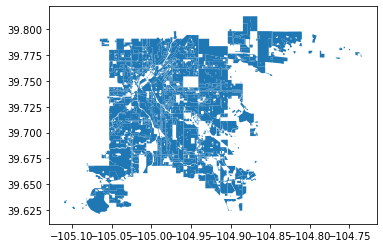

In [21]:
urbanzone.plot()

In [22]:
for item in urbanzone.columns[:-1]:
        uniquelist = urbanzone[item].unique()
        if uniquelist.flatten().shape[0]<12:
            print("Column name {}".format(item))
            print("Unique values {}".format(urbanzone[item].unique()))
            print("___________________________________")

Column name CODE_VERSI
Unique values [2010]
___________________________________
Column name NBHD_CONTE
Unique values ['URBAN' 'SPECIAL O-1' 'GENERAL URBAN' 'SUBURBAN' 'URBAN EDGE'
 'URBAN CENTER' 'SPECIAL CAMPUS' 'SPECIAL INDUSTRIAL' 'SPECIAL OPEN SPACE'
 'MASTER PLAN' 'DOWNTOWN']
___________________________________
Column name WAIVERS
Unique values [None 'WVRS']
___________________________________
Column name CONDITIONS
Unique values [None '*']
___________________________________
Column name PUD_NUM
Unique values [None]
___________________________________
Column name ORD_YEAR
Unique values [2010 2012 2011 2014 2013]
___________________________________
Column name PBG
Unique values [None]
___________________________________
Column name NOTES
Unique values [None 'Ord. 255-13 add CO-2 Overlay' 'Design Review District'
 'UO-3 is a map error, does not apply to MS Zone' 'and ord. 272 - 2012']
___________________________________
Column name GIS_NOTE
Unique values [None 'Included UO-3 in erro

In [26]:
trees.total_bounds

array([-105.31521515,   39.44396927, -104.63025366,   40.11139473])

In [38]:
urbanzone.total_bounds

array([-105.10993803,   39.62099088, -104.73456645,   39.81284558])

In [37]:
urbanzone.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
urbanzoneedge = urbanzone[urbanzone['NBHD_CONTE']=='URBAN EDGE']

<AxesSubplot:>

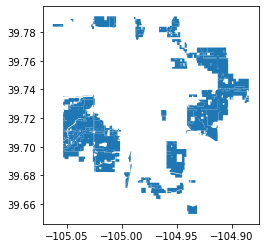

In [32]:
urbanzoneedge.plot()